<a href="https://colab.research.google.com/github/S-indhu/working-with-data/blob/main/file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

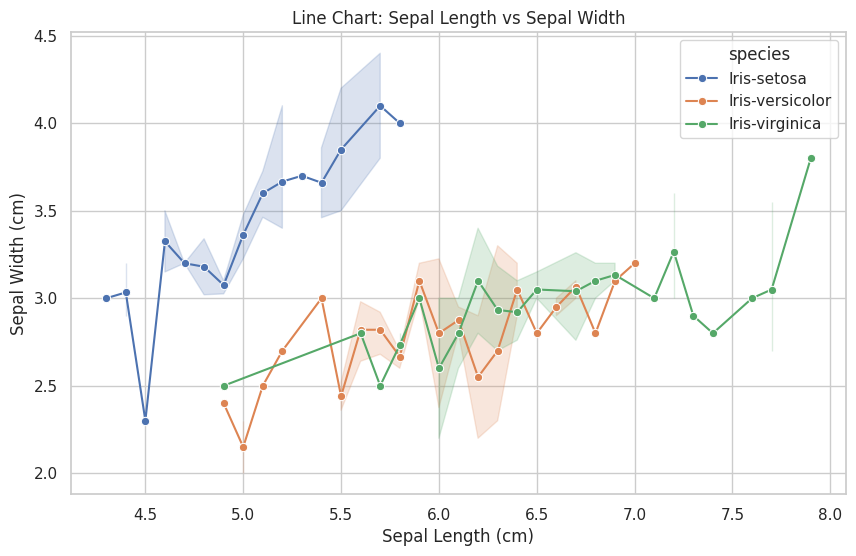

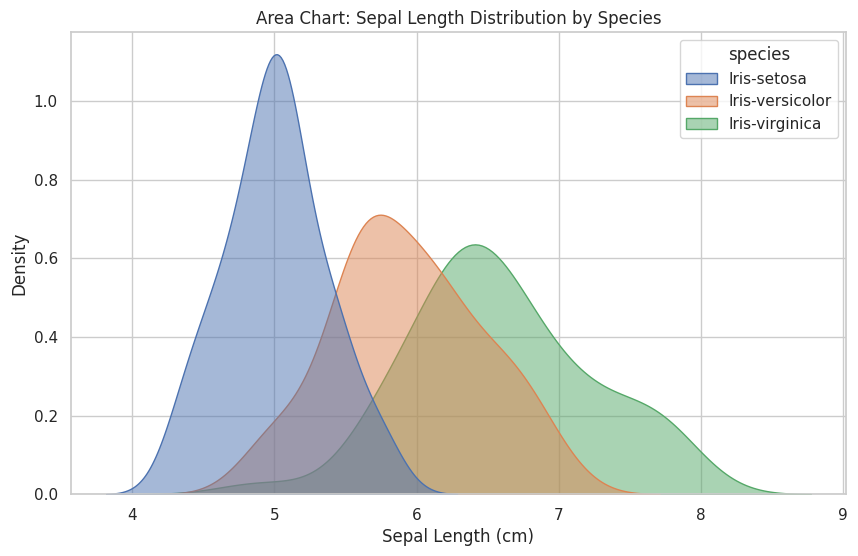

<ipython-input-1-6095c1da9cb8>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=iris_data, x='species', palette='viridis')


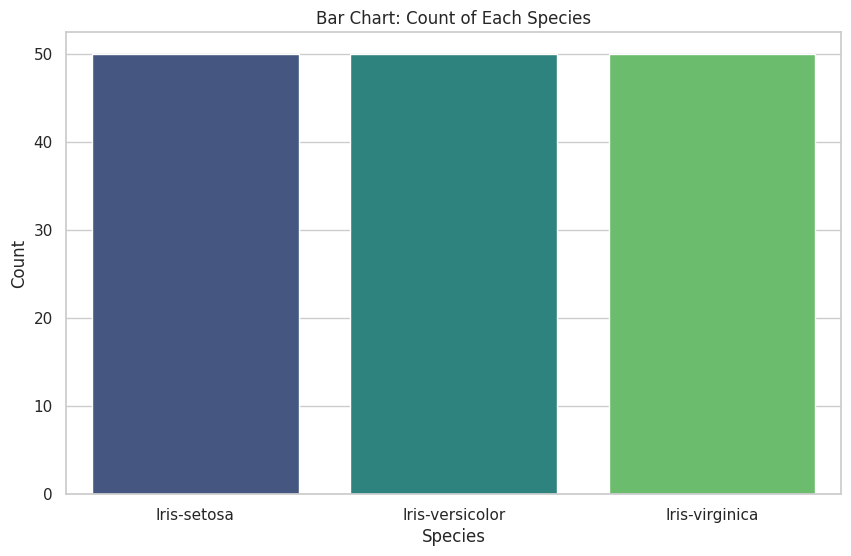

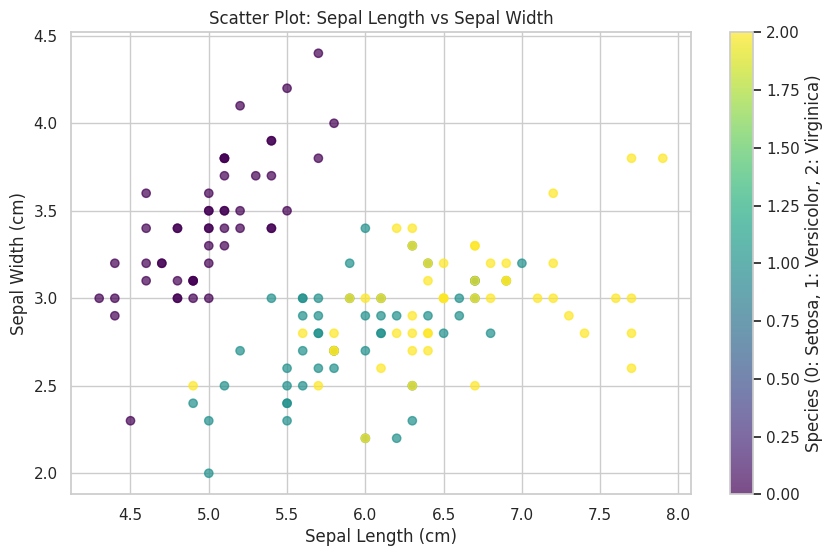

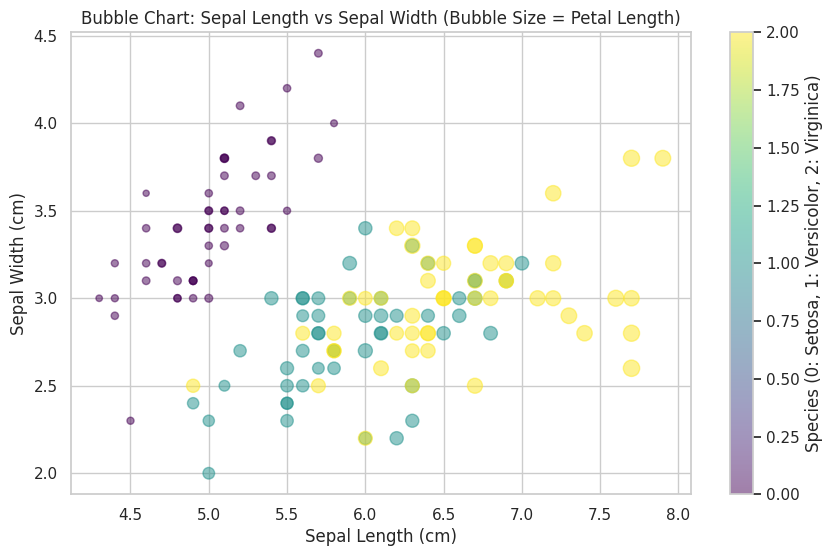

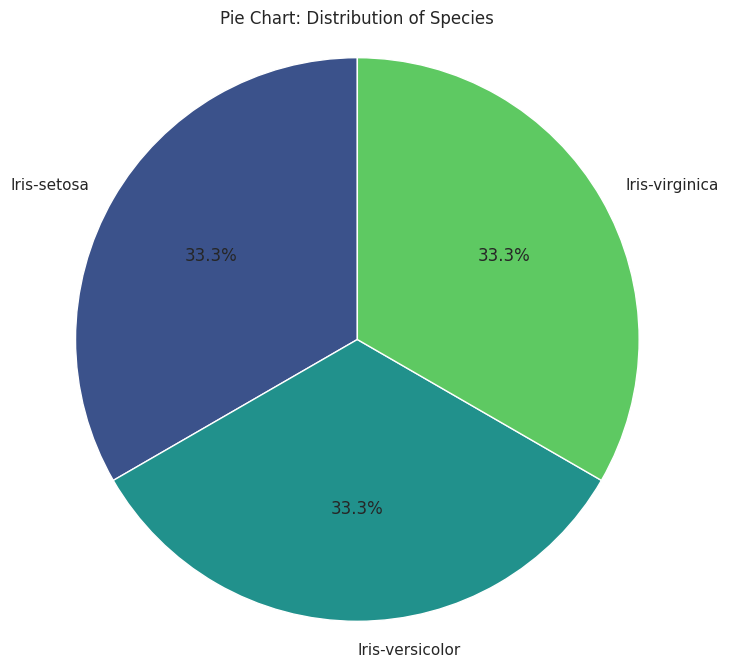

ValueError: could not convert string to float: 'Iris-setosa'

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # For map visualization

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data = pd.read_csv(url, header=None, names=columns)

# Set the style for seaborn
sns.set(style="whitegrid")

# Step 2: Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=iris_data, x='sepal_length', y='sepal_width', hue='species', marker='o')
plt.title('Line Chart: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Step 3: Area Chart
plt.figure(figsize=(10, 6))
sns.kdeplot(data=iris_data, x='sepal_length', hue='species', fill=True, common_norm=False, alpha=0.5)
plt.title('Area Chart: Sepal Length Distribution by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.show()

# Step 4: Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=iris_data, x='species', palette='viridis')
plt.title('Bar Chart: Count of Each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Step 5: Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'],
            c=iris_data['species'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Species (0: Setosa, 1: Versicolor, 2: Virginica)')
plt.show()

# Step 6: Bubble Chart
plt.figure(figsize=(10, 6))
plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'],
            s=iris_data['petal_length']*20,  # Bubble size based on petal length
            c=iris_data['species'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
plt.title('Bubble Chart: Sepal Length vs Sepal Width (Bubble Size = Petal Length)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Species (0: Setosa, 1: Versicolor, 2: Virginica)')
plt.show()

# Step 7: Pie Chart
species_counts = iris_data['species'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(species_counts)))
plt.title('Pie Chart: Distribution of Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Step 8: Heatmap
# Create a correlation matrix
correlation_matrix = iris_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap: Correlation Matrix of Iris Features')
plt.show()

# Step 9: Map Visualization (Mock Data)
# Create a mock dataset for mapping
mock_data = {
    'City': ['Setosa', 'Versicolor', 'Virginica'],
    'Latitude': [37.7749, 34.0522, 40.7128],
    'Longitude': [-122.4194, -118.2437, -74.0060]
}
map_data = pd.DataFrame(mock_data)

# Plotting the map
# Create a base map
m = folium.Map(location=[37.7749, -122.4194], zoom_start=4)

# Add points to the map
for _, row in map_data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['City']).add_to(m)

# Display the map
m